<img src="https://i.imgur.com/Av6bpdL.png" align=center> 

# CMEMS_3 DIVE 
# Part 3: validation of analyses with in-situ observations in the Leeuwin current


In this exercise we simply compare daily (and monthly averages of) 3D analyses from CMEMS GLO MFC with in-situ observations from CMEMS INS TAC.

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
<br>
**General Note 3**: Download the file with all dependencies and unzip while preserving file structure in the same directory as the notebook: [Download dependency file DIVE](https://atlas.mercator-ocean.fr/s/Ay4tqsG4QM4EC9Z)<br>
***

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting 2D data on maps. |

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

In [2]:
path_file1 = 'DIVE/LEEUWIN/DATA/OBS/GL_201101_TS_TS_VMQ9273.nc'
path_file2 = 'DIVE/LEEUWIN/DATA/OBS/GL_201102_TS_TS_VMQ9273.nc'
path_file3 = 'DIVE/LEEUWIN/DATA/OBS/GL_201103_TS_TS_VMQ9273.nc'
path_file4 = 'DIVE/LEEUWIN/DATA/OBS/GL_201104_TS_TS_VMQ9273.nc'
path_file5 = 'DIVE/LEEUWIN/DATA/OBS/GL_201105_TS_TS_VMQ9273.nc'
path_file6 = 'DIVE/LEEUWIN/DATA/OBS/GL_201106_TS_TS_VMQ9273.nc'
path_file7 = 'DIVE/LEEUWIN/DATA/MOD/PSY4_daily_decim_fact3_2011_WA.nc'

file1 = xr.open_dataset(path_file1)
file2 = xr.open_dataset(path_file2)
file3 = xr.open_dataset(path_file3)
file4 = xr.open_dataset(path_file4)
file5 = xr.open_dataset(path_file5)
file6 = xr.open_dataset(path_file6)
file7 = xr.open_dataset(path_file7)

In [3]:
date1 = np.datetime64('2011-01-01')
date2 = np.datetime64('2011-01-31')

lon_min = file1['LON'].min('LONGITUDE').data
lat_min = file1['LAT'].min('LATITUDE').data
lon_max = file1['LON'].max('LONGITUDE').data
lat_max = file1['LAT'].max('LATITUDE').data

t_min = file1['TEMP'].min('TIME').data
t_max = file1['TEMP'].max('TIME').data

s_min = file1['PSAL'].min('TIME').data
s_max = file1['PSAL'].max('TIME').data

tempmar = file1['TEMP'].data[0:19887:20,0]
salmar = file1['PSAL'].data[0:19887:20,0]
lonmar = file1['LON'].data[0:19887:20]
latmar = file1['LAT'].data[0:19887:20]

sample_t_HRG = []
sample_s_HRG = []
for i in range(19888):
    theta = file7['thetao'].sel(latitude=file1['LAT'].data[i],method='nearest').sel(longitude=file1['LON'].data[i],method='nearest').sel(time=file1['TIME'].data[i],method='nearest')
    so = file7['so'].sel(latitude=file1['LAT'].data[i],method='nearest').sel(longitude=file1['LON'].data[i],method='nearest').sel(time=file1['TIME'].data[i],method='nearest')
    sample_s_HRG.append(so.data)
    sample_t_HRG.append(theta.data)
    
sample_s_HRG=np.array(sample_s_HRG)
sample_t_HRG=np.array(sample_t_HRG)
thetao_sub = file7['thetao'].sel(time=slice(date1,date2))
thetao_sub_mean =thetao_sub.mean('time')

so_sub = file7['so'].sel(time=slice(date1,date2))
so_sub_mean =so_sub.mean('time')


<div class="alert alert-block alert-success">
<b>Question 1 :</b> Change the dates and dataset in the previous cell in order to look at different months/cruises. Why do you see vertical bars on the temperature scatter plots?
</div>

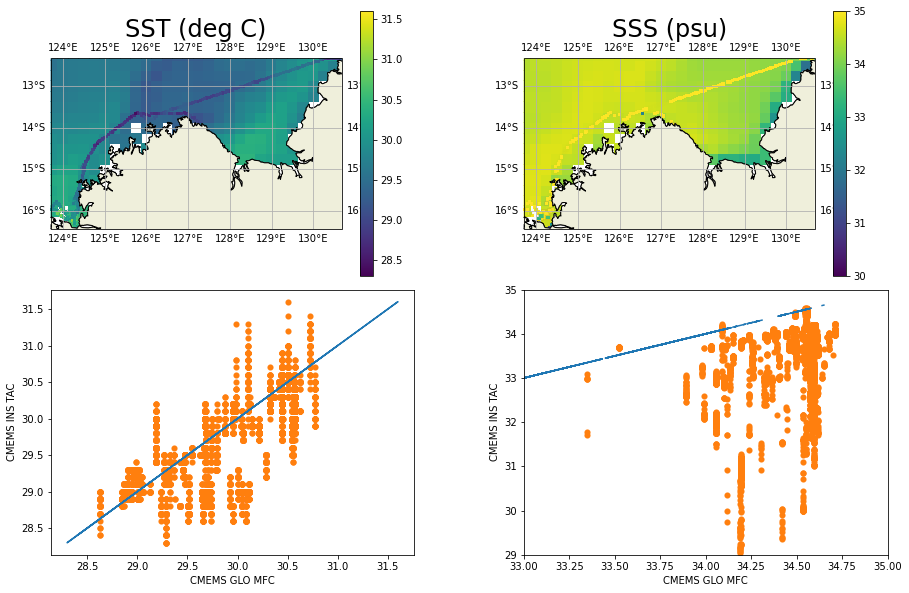

In [8]:
# define the plot caracteristics
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(221,projection=ccrs.PlateCarree())
ax2 = f.add_subplot(222,projection=ccrs.PlateCarree())
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

for ax in [ax1,ax2]:
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())


ax1.set_title("SST (deg C)",fontsize=24)
#ax3.set_title("X=Y",fontsize=24)
ax2.set_title("SSS (psu)",fontsize=24)
#ax4.set_title("X=Y",fontsize=24)

f.subplots_adjust(hspace=0.05,wspace=0.3)


im1 = ax1.pcolor(file7['longitude'].data,file7['latitude'].data, thetao_sub_mean.data[0],vmin = t_min, vmax= t_max,shading='nearest')
ax1.scatter(lonmar,latmar,c=tempmar,s=10,marker = 's', edgecolors='0.8',linewidth = 0.01, label='CRYOSAT 2',vmin = t_min, vmax= t_max)
plt.colorbar(im1,ax=ax1)

im2 = ax2.pcolor(file7['longitude'].data,file7['latitude'].data, so_sub_mean.data[0],vmin = 30, vmax= 35,shading='nearest')
ax2.scatter(lonmar,latmar,c=salmar,s=10,marker = 's', edgecolors='0.8',linewidth = 0.01, label='CRYOSAT 2',vmin = t_min, vmax= t_max)
plt.colorbar(im2,ax=ax2)

ax3.scatter(sample_t_HRG, file1['TEMP'].data,c='tab:orange',linewidth=0.1)
ax3.plot(file1['TEMP'].data,file1['TEMP'].data,c='tab:blue')
ax3.set_xlabel('CMEMS GLO MFC')
ax3.set_ylabel('CMEMS INS TAC')

               
ax4.scatter(sample_s_HRG,file1['PSAL'].data,c='tab:orange',linewidth=0.1)
ax4.plot(file1['PSAL'].data,file1['PSAL'].data,c='tab:blue')
ax4.set_xlabel('CMEMS GLO MFC')
ax4.set_ylabel('CMEMS INS TAC')
ax4.set(ylim=(29, 35),xlim=(33,35))

plt.savefig('DIVE/FIGURES/Part3/SST_SSS_map_plot.png')

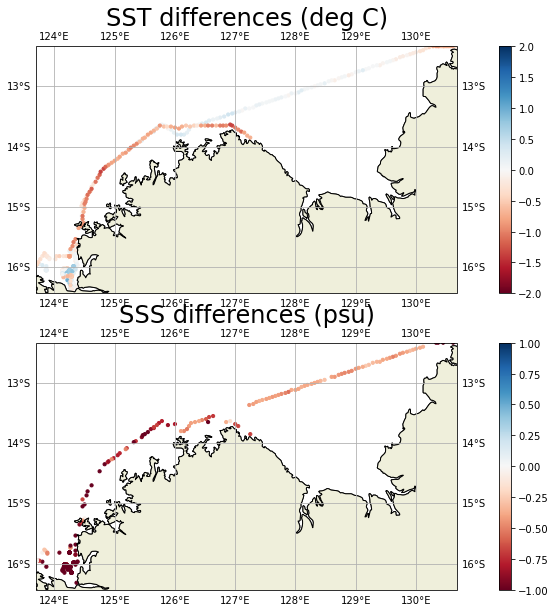

In [9]:
diffT= tempmar[:]-sample_t_HRG[0:19887:20,0]
diffS=salmar[:]-sample_s_HRG[0:19887:20,0]

f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(211,projection=ccrs.PlateCarree())
ax2 = f.add_subplot(212,projection=ccrs.PlateCarree())

for ax in [ax1,ax2]:
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
    
im1 = ax1.scatter(lonmar,latmar,c=diffT, s=10,vmin = -2, vmax = 2,cmap='RdBu')
ax1.set_title("SST differences (deg C)",fontsize=24)
plt.colorbar(im1,ax=ax1)


im2 =ax2.scatter(lonmar,latmar,c=diffS,s=10,vmin = -1,vmax = 1,cmap='RdBu')
ax2.set_title("SSS differences (psu)",fontsize=24)
plt.colorbar(im2,ax=ax2)

plt.savefig('DIVE/FIGURES/Part3/SST_SSS_difference.png')